## Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# FGSM

In [53]:
data = pd.read_csv('/content/FGSM.csv')

# Calculate accuracy on adversarial images
correct_predictions = data['Original Image'] == data['Prediction on Adversarial Image']
accuracy = correct_predictions.mean()

# Calculate mean prediction probability drop
probability_drop = data['Original Prediction Probability'] - data['Prediction Probability for Adversarial Image']
mean_probability_drop = probability_drop.mean()

# Calculate successful attack rate (where the prediction changed)
successful_attacks = data['Original Image'] != data['Prediction on Adversarial Image']
successful_attack_rate = successful_attacks.mean()

# Calculate confidence reduction in successful attacks
confidence_reduction = probability_drop[successful_attacks].mean()

# Global Metrics
overall_accuracy = correct_predictions.mean()
overall_mean_probability_drop = probability_drop.mean()
overall_successful_attack_rate = successful_attacks.mean()
overall_confidence_reduction = confidence_reduction

# Class-Wise Metrics Calculation
class_metrics = data.groupby('Original Image').apply(
    lambda group: pd.Series({
        'Class Accuracy': (group['Original Image'] == group['Prediction on Adversarial Image']).mean(),
        'Mean Prediction Probability Drop': (group['Original Prediction Probability'] - group['Prediction Probability for Adversarial Image']).mean(),
        'Successful Attack Rate': (group['Original Image'] != group['Prediction on Adversarial Image']).mean(),
        'Confidence Reduction in Successful Attacks': (group['Original Prediction Probability'] - group['Prediction Probability for Adversarial Image'])[group['Original Image'] != group['Prediction on Adversarial Image']].mean()
    })
)

# Ranking the classes based on vulnerability and confidence reduction
class_metrics['Vulnerability Rank'] = class_metrics['Successful Attack Rate'].rank(ascending=False)
class_metrics['Confidence Reduction Rank'] = class_metrics['Confidence Reduction in Successful Attacks'].rank(ascending=False)

# Display global metrics
print(f"Overall Accuracy on Adversarial Images: {overall_accuracy * 100:.2f}%")
print(f"Overall Mean Prediction Probability Drop: {overall_mean_probability_drop:.2f}%")
print(f"Overall Successful Attack Rate: {overall_successful_attack_rate * 100:.2f}%")
print(f"Overall Mean Confidence Reduction in Successful Attacks: {overall_confidence_reduction:.2f}%")

# Display class-wise metrics
print("\nClass-Wise Metrics:")
print(class_metrics)

# Class-wise inferences
for i, row in class_metrics.iterrows():
    print(f"\nClass {i}:")
    if row['Class Accuracy'] < 0.5:
        print(" - High effectiveness of FGSM attack; low accuracy.")
    elif row['Class Accuracy'] < 0.8:
        print(" - Moderate effectiveness of FGSM attack; accuracy is moderately reduced.")
    else:
        print(" - Low effectiveness of FGSM attack; accuracy remains relatively high.")

    if row['Successful Attack Rate'] > 0.5:
        print(" - High vulnerability to adversarial attacks.")
    elif row['Successful Attack Rate'] > 0.2:
        print(" - Moderate vulnerability to adversarial attacks.")
    else:
        print(" - Low vulnerability to adversarial attacks.")

    if row['Mean Prediction Probability Drop'] > 10:
        print(" - Significant reduction in model's confidence.")
    elif row['Mean Prediction Probability Drop'] > 5:
        print(" - Moderate reduction in model's confidence.")
    else:
        print(" - Limited impact on model's confidence.")

# Display rankings
print("\nClass Vulnerability Rankings:")
print(class_metrics[['Successful Attack Rate', 'Vulnerability Rank']].sort_values(by='Vulnerability Rank'))

print("\nClass Confidence Reduction Rankings:")
print(class_metrics[['Confidence Reduction in Successful Attacks', 'Confidence Reduction Rank']].sort_values(by='Confidence Reduction Rank'))


Overall Accuracy on Adversarial Images: 62.22%
Overall Mean Prediction Probability Drop: -1.44%
Overall Successful Attack Rate: 37.78%
Overall Mean Confidence Reduction in Successful Attacks: -1.72%

Class-Wise Metrics:
                Class Accuracy  Mean Prediction Probability Drop  \
Original Image                                                     
0                     1.000000                          0.000000   
1                     0.333333                          0.911111   
2                     0.777778                          0.480000   
3                     0.555556                         -3.252222   
4                     0.555556                         -2.175556   
5                     0.666667                         -1.742222   
6                     0.555556                         -0.181111   
7                     0.888889                         -0.018889   
8                     0.333333                        -18.638889   
9                     0.555556  

<ipython-input-54-15ae5014e1ea>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics.index, y='Class Accuracy', data=class_metrics, palette='viridis')


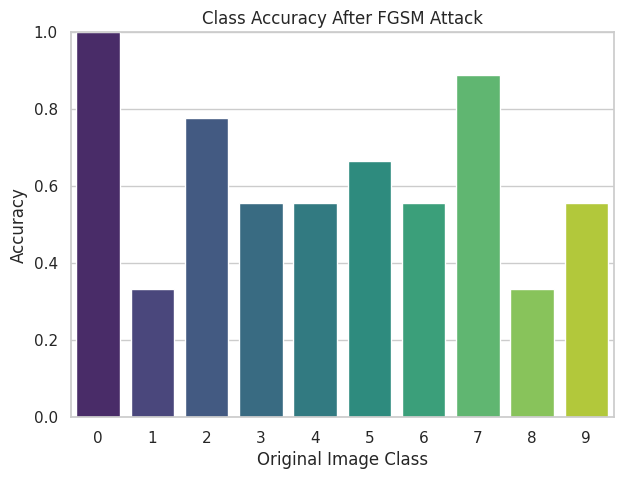

<ipython-input-54-15ae5014e1ea>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics.index, y='Mean Prediction Probability Drop', data=class_metrics, palette='coolwarm')


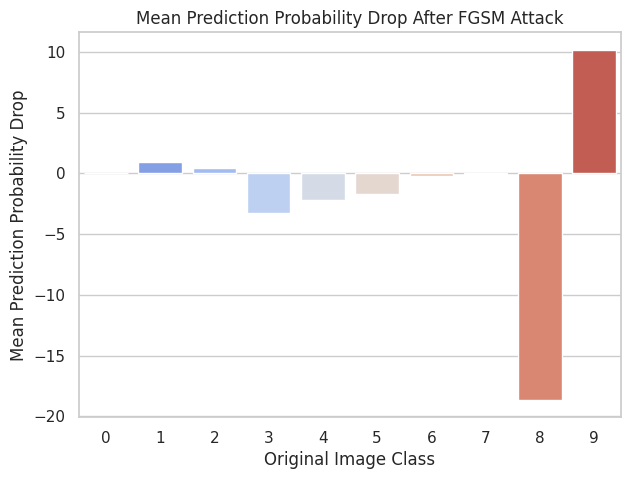

<ipython-input-54-15ae5014e1ea>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics.index, y='Successful Attack Rate', data=class_metrics, palette='magma')


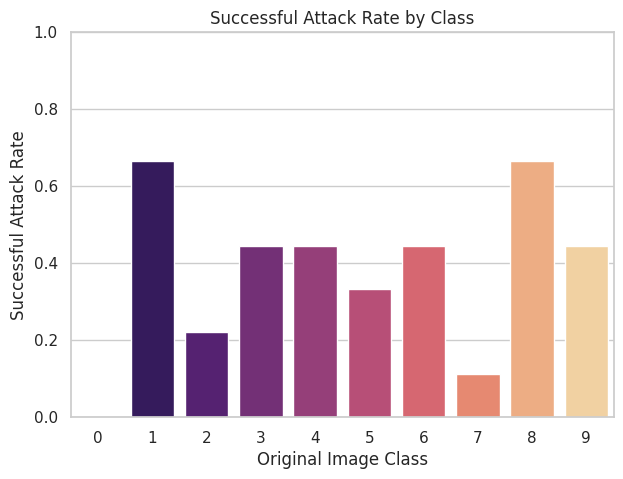

<ipython-input-54-15ae5014e1ea>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics.index, y='Confidence Reduction in Successful Attacks', data=class_metrics, palette='coolwarm')


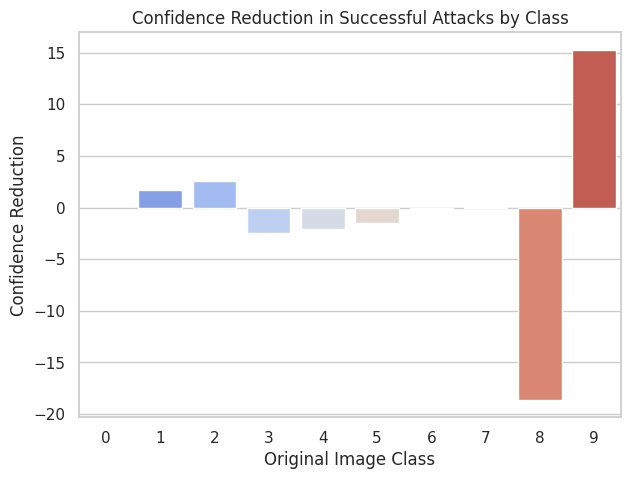

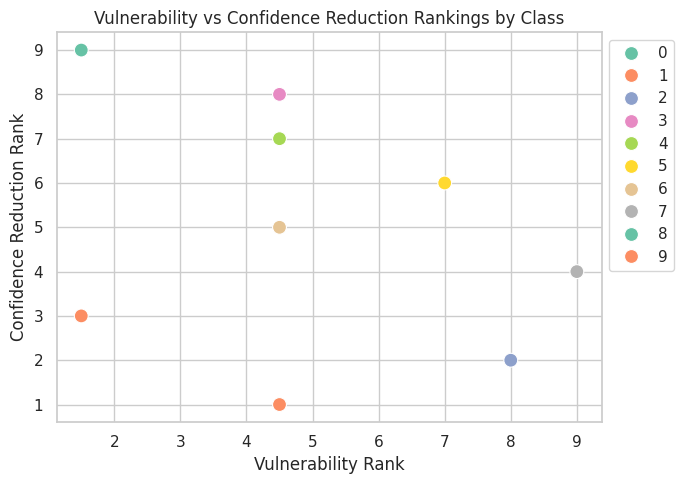

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'class_metrics' contains the calculated class-wise metrics and ranks.

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Bar Plot for Class Accuracy
plt.figure(figsize=(7, 5))
sns.barplot(x=class_metrics.index, y='Class Accuracy', data=class_metrics, palette='viridis')
plt.title('Class Accuracy After FGSM Attack')
plt.xlabel('Original Image Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# 2. Bar Plot for Mean Prediction Probability Drop
plt.figure(figsize=(7, 5))
sns.barplot(x=class_metrics.index, y='Mean Prediction Probability Drop', data=class_metrics, palette='coolwarm')
plt.title('Mean Prediction Probability Drop After FGSM Attack')
plt.xlabel('Original Image Class')
plt.ylabel('Mean Prediction Probability Drop')
plt.show()

# 3. Bar Plot for Successful Attack Rate
plt.figure(figsize=(7, 5))
sns.barplot(x=class_metrics.index, y='Successful Attack Rate', data=class_metrics, palette='magma')
plt.title('Successful Attack Rate by Class')
plt.xlabel('Original Image Class')
plt.ylabel('Successful Attack Rate')
plt.ylim(0, 1)
plt.show()

# 4. Bar Plot for Confidence Reduction in Successful Attacks
plt.figure(figsize=(7, 5))
sns.barplot(x=class_metrics.index, y='Confidence Reduction in Successful Attacks', data=class_metrics, palette='coolwarm')
plt.title('Confidence Reduction in Successful Attacks by Class')
plt.xlabel('Original Image Class')
plt.ylabel('Confidence Reduction')
plt.show()

plt.figure(figsize=(7, 5))
sns.scatterplot(x='Vulnerability Rank', y='Confidence Reduction Rank', data=class_metrics, hue=class_metrics.index, palette='Set2', s=100)
plt.title('Vulnerability vs Confidence Reduction Rankings by Class')
plt.xlabel('Vulnerability Rank')
plt.ylabel('Confidence Reduction Rank')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust position to the right
plt.tight_layout()  # Adjust layout to accommodate legend
plt.show()



# BIM

In [55]:
data = pd.read_csv('/content/BIM.csv')

# Calculate accuracy on adversarial images
correct_predictions = data['Original Image'] == data['Prediction on Adversarial Image']
accuracy = correct_predictions.mean()

# Calculate mean prediction probability drop
probability_drop = data['Original Prediction Probability'] - data['Prediction Probability for Adversarial Image']
mean_probability_drop = probability_drop.mean()

# Calculate successful attack rate (where the prediction changed)
successful_attacks = data['Original Image'] != data['Prediction on Adversarial Image']
successful_attack_rate = successful_attacks.mean()

# Calculate confidence reduction in successful attacks
confidence_reduction = probability_drop[successful_attacks].mean()

# Global Metrics
overall_accuracy = correct_predictions.mean()
overall_mean_probability_drop = probability_drop.mean()
overall_successful_attack_rate = successful_attacks.mean()
overall_confidence_reduction = confidence_reduction

# Class-Wise Metrics Calculation
class_metrics = data.groupby('Original Image').apply(
    lambda group: pd.Series({
        'Class Accuracy': (group['Original Image'] == group['Prediction on Adversarial Image']).mean(),
        'Mean Prediction Probability Drop': (group['Original Prediction Probability'] - group['Prediction Probability for Adversarial Image']).mean(),
        'Successful Attack Rate': (group['Original Image'] != group['Prediction on Adversarial Image']).mean(),
        'Confidence Reduction in Successful Attacks': (group['Original Prediction Probability'] - group['Prediction Probability for Adversarial Image'])[group['Original Image'] != group['Prediction on Adversarial Image']].mean()
    })
)

# Ranking the classes based on vulnerability and confidence reduction
class_metrics['Vulnerability Rank'] = class_metrics['Successful Attack Rate'].rank(ascending=False)
class_metrics['Confidence Reduction Rank'] = class_metrics['Confidence Reduction in Successful Attacks'].rank(ascending=False)

# Display global metrics
print(f"Overall Accuracy on Adversarial Images: {overall_accuracy * 100:.2f}%")
print(f"Overall Mean Prediction Probability Drop: {overall_mean_probability_drop:.2f}%")
print(f"Overall Successful Attack Rate: {overall_successful_attack_rate * 100:.2f}%")
print(f"Overall Mean Confidence Reduction in Successful Attacks: {overall_confidence_reduction:.2f}%")

# Display class-wise metrics
print("\nClass-Wise Metrics:")
print(class_metrics)

# Class-wise inferences
for i, row in class_metrics.iterrows():
    print(f"\nClass {i}:")
    if row['Class Accuracy'] < 0.5:
        print(" - High effectiveness of BIM attack; low accuracy.")
    elif row['Class Accuracy'] < 0.8:
        print(" - Moderate effectiveness of BIM attack; accuracy is moderately reduced.")
    else:
        print(" - Low effectiveness of BIM attack; accuracy remains relatively high.")

    if row['Successful Attack Rate'] > 0.5:
        print(" - High vulnerability to adversarial attacks.")
    elif row['Successful Attack Rate'] > 0.2:
        print(" - Moderate vulnerability to adversarial attacks.")
    else:
        print(" - Low vulnerability to adversarial attacks.")

    if row['Mean Prediction Probability Drop'] > 10:
        print(" - Significant reduction in model's confidence.")
    elif row['Mean Prediction Probability Drop'] > 5:
        print(" - Moderate reduction in model's confidence.")
    else:
        print(" - Limited impact on model's confidence.")

# Display rankings
print("\nClass Vulnerability Rankings:")
print(class_metrics[['Successful Attack Rate', 'Vulnerability Rank']].sort_values(by='Vulnerability Rank'))

print("\nClass Confidence Reduction Rankings:")
print(class_metrics[['Confidence Reduction in Successful Attacks', 'Confidence Reduction Rank']].sort_values(by='Confidence Reduction Rank'))


Overall Accuracy on Adversarial Images: 6.67%
Overall Mean Prediction Probability Drop: 12.35%
Overall Successful Attack Rate: 93.33%
Overall Mean Confidence Reduction in Successful Attacks: 11.60%

Class-Wise Metrics:
                Class Accuracy  Mean Prediction Probability Drop  \
Original Image                                                     
0                     0.444444                         14.291111   
1                     0.000000                         16.678889   
2                     0.222222                         16.972222   
3                     0.000000                         11.642222   
4                     0.000000                         20.393333   
5                     0.000000                         12.445556   
6                     0.000000                         24.160000   
7                     0.000000                         10.810000   
8                     0.000000                        -12.067778   
9                     0.000000   

<ipython-input-56-9b68a2500d5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics.index, y='Class Accuracy', data=class_metrics, palette='viridis')


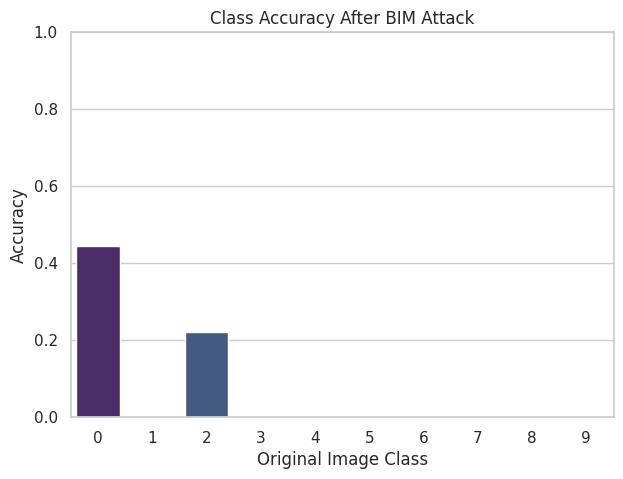

<ipython-input-56-9b68a2500d5d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics.index, y='Mean Prediction Probability Drop', data=class_metrics, palette='coolwarm')


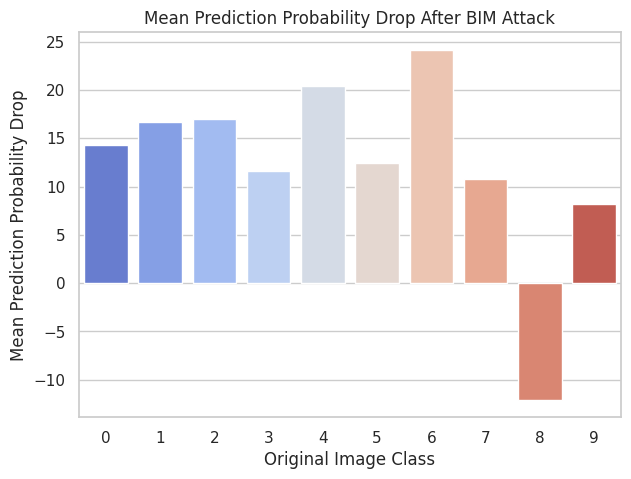

<ipython-input-56-9b68a2500d5d>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics.index, y='Successful Attack Rate', data=class_metrics, palette='magma')


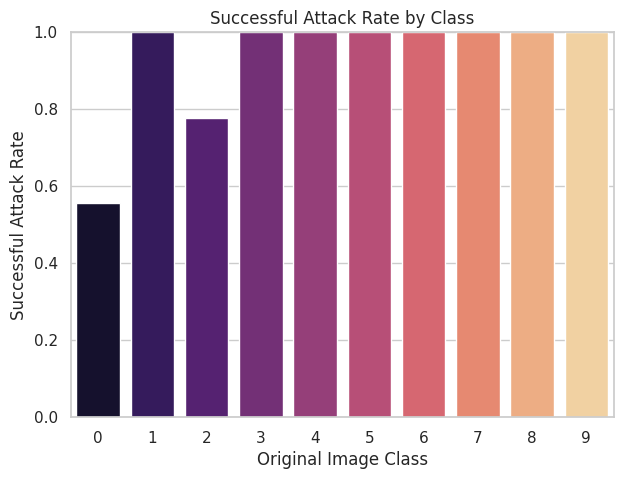

<ipython-input-56-9b68a2500d5d>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics.index, y='Confidence Reduction in Successful Attacks', data=class_metrics, palette='coolwarm')


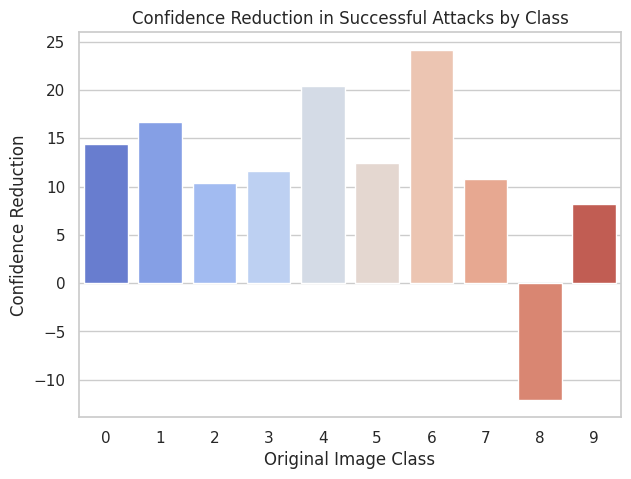

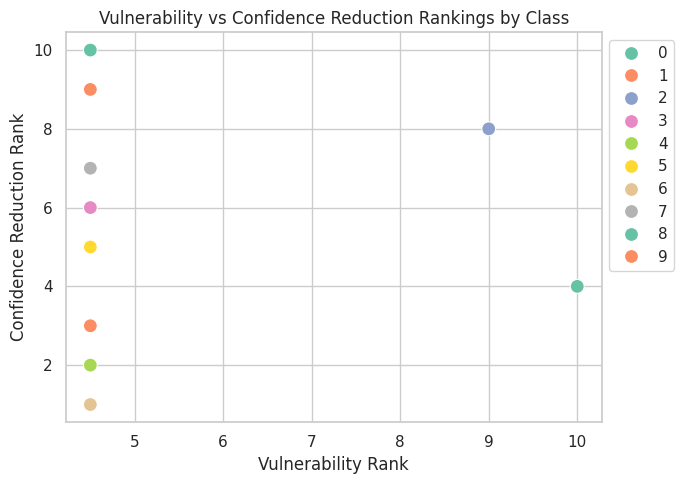

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'class_metrics' contains the calculated class-wise metrics and ranks.

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Bar Plot for Class Accuracy
plt.figure(figsize=(7, 5))
sns.barplot(x=class_metrics.index, y='Class Accuracy', data=class_metrics, palette='viridis')
plt.title('Class Accuracy After BIM Attack')
plt.xlabel('Original Image Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# 2. Bar Plot for Mean Prediction Probability Drop
plt.figure(figsize=(7, 5))
sns.barplot(x=class_metrics.index, y='Mean Prediction Probability Drop', data=class_metrics, palette='coolwarm')
plt.title('Mean Prediction Probability Drop After BIM Attack')
plt.xlabel('Original Image Class')
plt.ylabel('Mean Prediction Probability Drop')
plt.show()

# 3. Bar Plot for Successful Attack Rate
plt.figure(figsize=(7, 5))
sns.barplot(x=class_metrics.index, y='Successful Attack Rate', data=class_metrics, palette='magma')
plt.title('Successful Attack Rate by Class')
plt.xlabel('Original Image Class')
plt.ylabel('Successful Attack Rate')
plt.ylim(0, 1)
plt.show()

# 4. Bar Plot for Confidence Reduction in Successful Attacks
plt.figure(figsize=(7, 5))
sns.barplot(x=class_metrics.index, y='Confidence Reduction in Successful Attacks', data=class_metrics, palette='coolwarm')
plt.title('Confidence Reduction in Successful Attacks by Class')
plt.xlabel('Original Image Class')
plt.ylabel('Confidence Reduction')
plt.show()

plt.figure(figsize=(7, 5))
sns.scatterplot(x='Vulnerability Rank', y='Confidence Reduction Rank', data=class_metrics, hue=class_metrics.index, palette='Set2', s=100)
plt.title('Vulnerability vs Confidence Reduction Rankings by Class')
plt.xlabel('Vulnerability Rank')
plt.ylabel('Confidence Reduction Rank')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust position to the right
plt.tight_layout()  # Adjust layout to accommodate legend
plt.show()



# JBSM

In [57]:
data = pd.read_csv('/content/JBSM.csv')

# Calculate accuracy on adversarial images
correct_predictions = data['Original Image'] == data['Prediction on Adversarial Image']
accuracy = correct_predictions.mean()

# Calculate mean prediction probability drop
probability_drop = data['Original Prediction Probability'] - data['Prediction Probability for Adversarial Image']
mean_probability_drop = probability_drop.mean()

# Calculate successful attack rate (where the prediction changed)
successful_attacks = data['Original Image'] != data['Prediction on Adversarial Image']
successful_attack_rate = successful_attacks.mean()

# Calculate confidence reduction in successful attacks
confidence_reduction = probability_drop[successful_attacks].mean()

# Global Metrics
overall_accuracy = correct_predictions.mean()
overall_mean_probability_drop = probability_drop.mean()
overall_successful_attack_rate = successful_attacks.mean()
overall_confidence_reduction = confidence_reduction

# Class-Wise Metrics Calculation
class_metrics = data.groupby('Original Image').apply(
    lambda group: pd.Series({
        'Class Accuracy': (group['Original Image'] == group['Prediction on Adversarial Image']).mean(),
        'Mean Prediction Probability Drop': (group['Original Prediction Probability'] - group['Prediction Probability for Adversarial Image']).mean(),
        'Successful Attack Rate': (group['Original Image'] != group['Prediction on Adversarial Image']).mean(),
        'Confidence Reduction in Successful Attacks': (group['Original Prediction Probability'] - group['Prediction Probability for Adversarial Image'])[group['Original Image'] != group['Prediction on Adversarial Image']].mean()
    })
)

# Ranking the classes based on vulnerability and confidence reduction
class_metrics['Vulnerability Rank'] = class_metrics['Successful Attack Rate'].rank(ascending=False)
class_metrics['Confidence Reduction Rank'] = class_metrics['Confidence Reduction in Successful Attacks'].rank(ascending=False)

# Display global metrics
print(f"Overall Accuracy on Adversarial Images: {overall_accuracy * 100:.2f}%")
print(f"Overall Mean Prediction Probability Drop: {overall_mean_probability_drop:.2f}%")
print(f"Overall Successful Attack Rate: {overall_successful_attack_rate * 100:.2f}%")
print(f"Overall Mean Confidence Reduction in Successful Attacks: {overall_confidence_reduction:.2f}%")

# Display class-wise metrics
print("\nClass-Wise Metrics:")
print(class_metrics)

# Class-wise inferences
for i, row in class_metrics.iterrows():
    print(f"\nClass {i}:")
    if row['Class Accuracy'] < 0.5:
        print(" - High effectiveness of JBSM attack; low accuracy.")
    elif row['Class Accuracy'] < 0.8:
        print(" - Moderate effectiveness of JBSM attack; accuracy is moderately reduced.")
    else:
        print(" - Low effectiveness of JBSM attack; accuracy remains relatively high.")

    if row['Successful Attack Rate'] > 0.5:
        print(" - High vulnerability to adversarial attacks.")
    elif row['Successful Attack Rate'] > 0.2:
        print(" - Moderate vulnerability to adversarial attacks.")
    else:
        print(" - Low vulnerability to adversarial attacks.")

    if row['Mean Prediction Probability Drop'] > 10:
        print(" - Significant reduction in model's confidence.")
    elif row['Mean Prediction Probability Drop'] > 5:
        print(" - Moderate reduction in model's confidence.")
    else:
        print(" - Limited impact on model's confidence.")

# Display rankings
print("\nClass Vulnerability Rankings:")
print(class_metrics[['Successful Attack Rate', 'Vulnerability Rank']].sort_values(by='Vulnerability Rank'))

print("\nClass Confidence Reduction Rankings:")
print(class_metrics[['Confidence Reduction in Successful Attacks', 'Confidence Reduction Rank']].sort_values(by='Confidence Reduction Rank'))


Overall Accuracy on Adversarial Images: 4.44%
Overall Mean Prediction Probability Drop: 7.26%
Overall Successful Attack Rate: 95.56%
Overall Mean Confidence Reduction in Successful Attacks: 5.95%

Class-Wise Metrics:
                Class Accuracy  Mean Prediction Probability Drop  \
Original Image                                                     
0                     0.111111                          7.567778   
1                     0.000000                          0.371111   
2                     0.000000                         22.124444   
3                     0.222222                         17.597778   
4                     0.000000                          0.695556   
5                     0.000000                         -0.034444   
6                     0.111111                          8.048889   
7                     0.000000                         19.674444   
8                     0.000000                         -7.468889   
9                     0.000000     

<ipython-input-58-033ab3cb644c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics.index, y='Class Accuracy', data=class_metrics, palette='viridis')


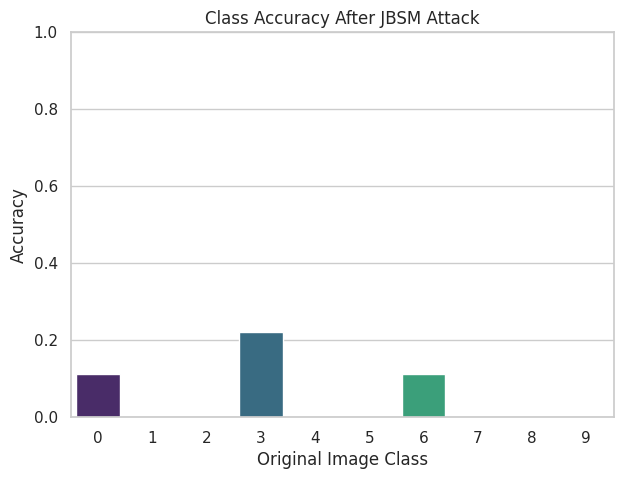

<ipython-input-58-033ab3cb644c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics.index, y='Mean Prediction Probability Drop', data=class_metrics, palette='coolwarm')


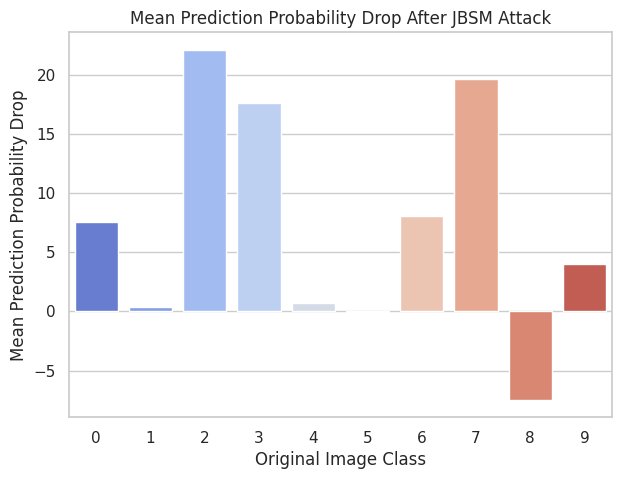

<ipython-input-58-033ab3cb644c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics.index, y='Successful Attack Rate', data=class_metrics, palette='magma')


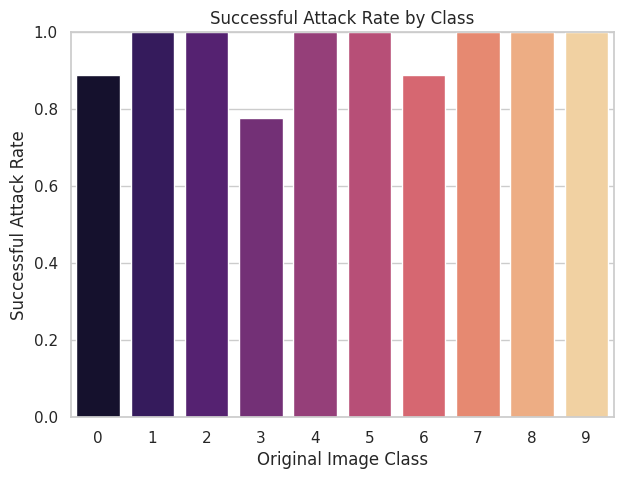

<ipython-input-58-033ab3cb644c>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics.index, y='Confidence Reduction in Successful Attacks', data=class_metrics, palette='coolwarm')


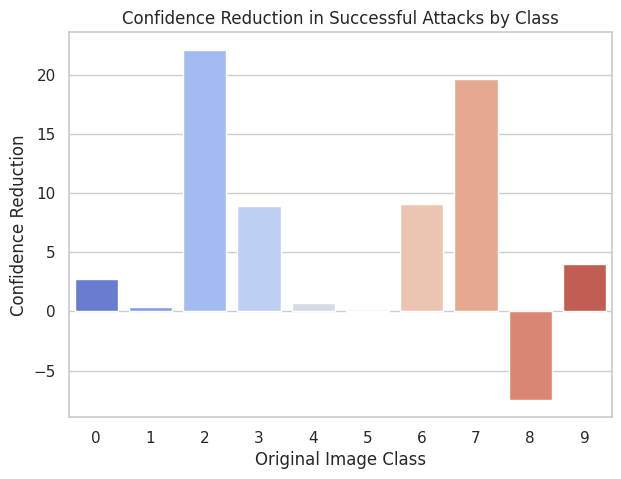

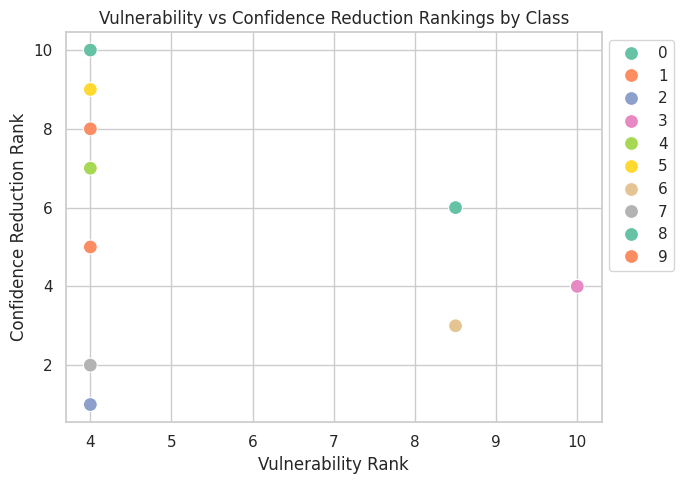

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'class_metrics' contains the calculated class-wise metrics and ranks.

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Bar Plot for Class Accuracy
plt.figure(figsize=(7, 5))
sns.barplot(x=class_metrics.index, y='Class Accuracy', data=class_metrics, palette='viridis')
plt.title('Class Accuracy After JBSM Attack')
plt.xlabel('Original Image Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# 2. Bar Plot for Mean Prediction Probability Drop
plt.figure(figsize=(7, 5))
sns.barplot(x=class_metrics.index, y='Mean Prediction Probability Drop', data=class_metrics, palette='coolwarm')
plt.title('Mean Prediction Probability Drop After JBSM Attack')
plt.xlabel('Original Image Class')
plt.ylabel('Mean Prediction Probability Drop')
plt.show()

# 3. Bar Plot for Successful Attack Rate
plt.figure(figsize=(7, 5))
sns.barplot(x=class_metrics.index, y='Successful Attack Rate', data=class_metrics, palette='magma')
plt.title('Successful Attack Rate by Class')
plt.xlabel('Original Image Class')
plt.ylabel('Successful Attack Rate')
plt.ylim(0, 1)
plt.show()

# 4. Bar Plot for Confidence Reduction in Successful Attacks
plt.figure(figsize=(7, 5))
sns.barplot(x=class_metrics.index, y='Confidence Reduction in Successful Attacks', data=class_metrics, palette='coolwarm')
plt.title('Confidence Reduction in Successful Attacks by Class')
plt.xlabel('Original Image Class')
plt.ylabel('Confidence Reduction')
plt.show()

plt.figure(figsize=(7, 5))
sns.scatterplot(x='Vulnerability Rank', y='Confidence Reduction Rank', data=class_metrics, hue=class_metrics.index, palette='Set2', s=100)
plt.title('Vulnerability vs Confidence Reduction Rankings by Class')
plt.xlabel('Vulnerability Rank')
plt.ylabel('Confidence Reduction Rank')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust position to the right
plt.tight_layout()  # Adjust layout to accommodate legend
plt.show()



# CW

In [59]:
data = pd.read_csv('/content/CW.csv')

# Calculate accuracy on adversarial images
correct_predictions = data['Original Image'] == data['Prediction on Adversarial Image']
accuracy = correct_predictions.mean()

# Calculate mean prediction probability drop
probability_drop = data['Original Prediction Probability'] - data['Prediction Probability for Adversarial Image']
mean_probability_drop = probability_drop.mean()

# Calculate successful attack rate (where the prediction changed)
successful_attacks = data['Original Image'] != data['Prediction on Adversarial Image']
successful_attack_rate = successful_attacks.mean()

# Calculate confidence reduction in successful attacks
confidence_reduction = probability_drop[successful_attacks].mean()

# Global Metrics
overall_accuracy = correct_predictions.mean()
overall_mean_probability_drop = probability_drop.mean()
overall_successful_attack_rate = successful_attacks.mean()
overall_confidence_reduction = confidence_reduction

# Class-Wise Metrics Calculation
class_metrics = data.groupby('Original Image').apply(
    lambda group: pd.Series({
        'Class Accuracy': (group['Original Image'] == group['Prediction on Adversarial Image']).mean(),
        'Mean Prediction Probability Drop': (group['Original Prediction Probability'] - group['Prediction Probability for Adversarial Image']).mean(),
        'Successful Attack Rate': (group['Original Image'] != group['Prediction on Adversarial Image']).mean(),
        'Confidence Reduction in Successful Attacks': (group['Original Prediction Probability'] - group['Prediction Probability for Adversarial Image'])[group['Original Image'] != group['Prediction on Adversarial Image']].mean()
    })
)

# Ranking the classes based on vulnerability and confidence reduction
class_metrics['Vulnerability Rank'] = class_metrics['Successful Attack Rate'].rank(ascending=False)
class_metrics['Confidence Reduction Rank'] = class_metrics['Confidence Reduction in Successful Attacks'].rank(ascending=False)

# Display global metrics
print(f"Overall Accuracy on Adversarial Images: {overall_accuracy * 100:.2f}%")
print(f"Overall Mean Prediction Probability Drop: {overall_mean_probability_drop:.2f}%")
print(f"Overall Successful Attack Rate: {overall_successful_attack_rate * 100:.2f}%")
print(f"Overall Mean Confidence Reduction in Successful Attacks: {overall_confidence_reduction:.2f}%")

# Display class-wise metrics
print("\nClass-Wise Metrics:")
print(class_metrics)

# Class-wise inferences
for i, row in class_metrics.iterrows():
    print(f"\nClass {i}:")
    if row['Class Accuracy'] < 0.5:
        print(" - High effectiveness of CW attack; low accuracy.")
    elif row['Class Accuracy'] < 0.8:
        print(" - Moderate effectiveness of CW attack; accuracy is moderately reduced.")
    else:
        print(" - Low effectiveness of CW attack; accuracy remains relatively high.")

    if row['Successful Attack Rate'] > 0.5:
        print(" - High vulnerability to adversarial attacks.")
    elif row['Successful Attack Rate'] > 0.2:
        print(" - Moderate vulnerability to adversarial attacks.")
    else:
        print(" - Low vulnerability to adversarial attacks.")

    if row['Mean Prediction Probability Drop'] > 10:
        print(" - Significant reduction in model's confidence.")
    elif row['Mean Prediction Probability Drop'] > 5:
        print(" - Moderate reduction in model's confidence.")
    else:
        print(" - Limited impact on model's confidence.")

# Display rankings
print("\nClass Vulnerability Rankings:")
print(class_metrics[['Successful Attack Rate', 'Vulnerability Rank']].sort_values(by='Vulnerability Rank'))

print("\nClass Confidence Reduction Rankings:")
print(class_metrics[['Confidence Reduction in Successful Attacks', 'Confidence Reduction Rank']].sort_values(by='Confidence Reduction Rank'))


Overall Accuracy on Adversarial Images: 0.00%
Overall Mean Prediction Probability Drop: 39.68%
Overall Successful Attack Rate: 100.00%
Overall Mean Confidence Reduction in Successful Attacks: 39.68%

Class-Wise Metrics:
                Class Accuracy  Mean Prediction Probability Drop  \
Original Image                                                     
0                          0.0                         36.257778   
1                          0.0                         44.171111   
2                          0.0                         44.442222   
3                          0.0                         38.183333   
4                          0.0                         43.320000   
5                          0.0                         43.693333   
6                          0.0                         38.456667   
7                          0.0                         41.802222   
8                          0.0                         19.466667   
9                          0.0  

<ipython-input-60-3e9323c0d6d7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics.index, y='Class Accuracy', data=class_metrics, palette='viridis')


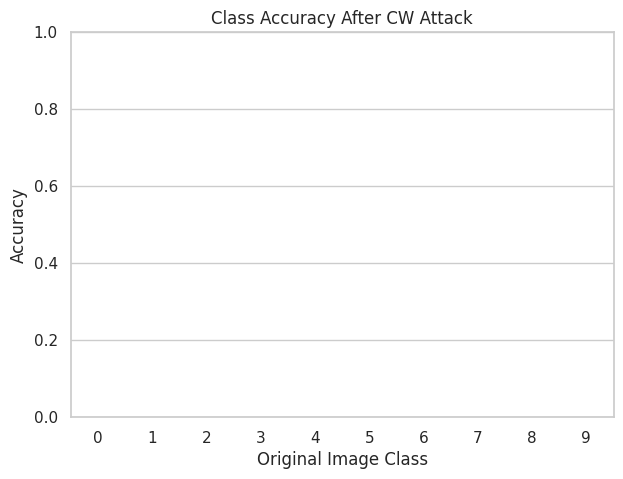

<ipython-input-60-3e9323c0d6d7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics.index, y='Mean Prediction Probability Drop', data=class_metrics, palette='coolwarm')


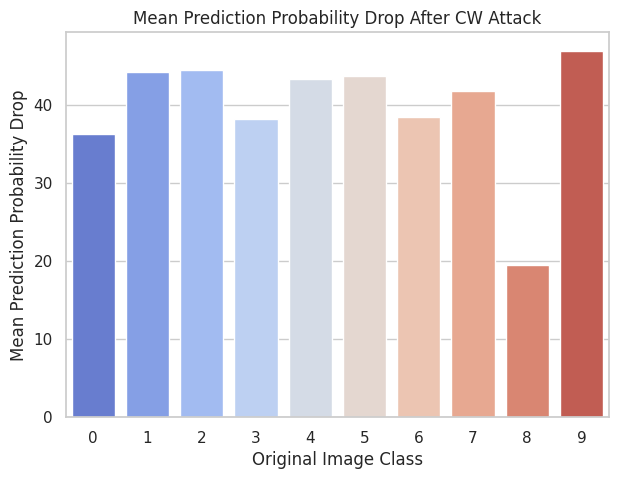

<ipython-input-60-3e9323c0d6d7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics.index, y='Successful Attack Rate', data=class_metrics, palette='magma')


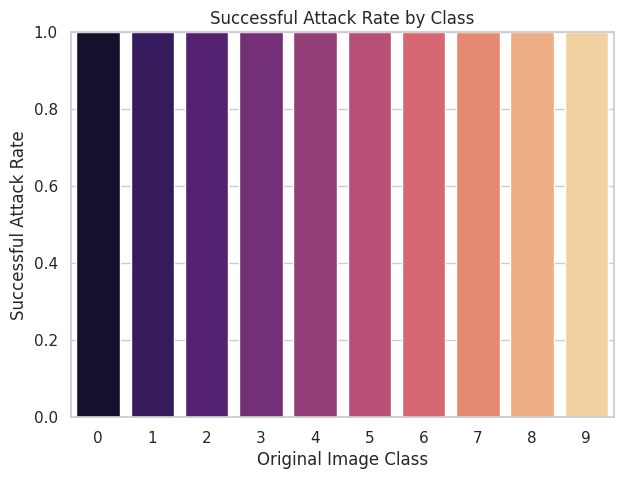

<ipython-input-60-3e9323c0d6d7>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics.index, y='Confidence Reduction in Successful Attacks', data=class_metrics, palette='coolwarm')


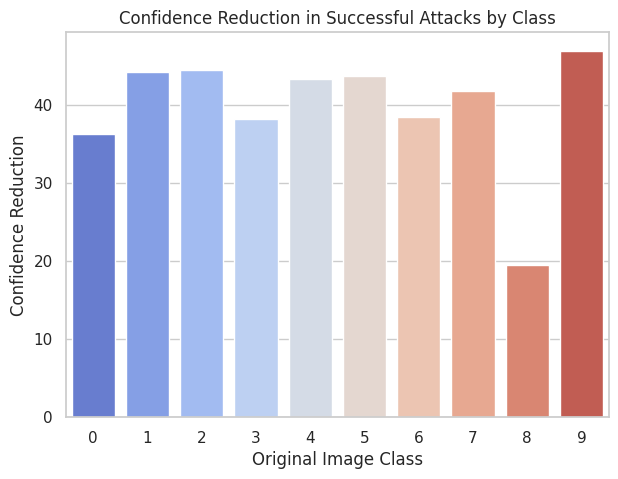

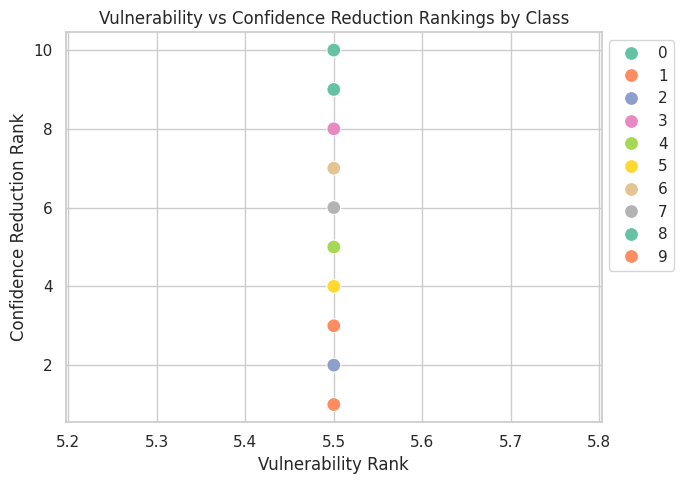

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'class_metrics' contains the calculated class-wise metrics and ranks.

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Bar Plot for Class Accuracy
plt.figure(figsize=(7, 5))
sns.barplot(x=class_metrics.index, y='Class Accuracy', data=class_metrics, palette='viridis')
plt.title('Class Accuracy After CW Attack')
plt.xlabel('Original Image Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# 2. Bar Plot for Mean Prediction Probability Drop
plt.figure(figsize=(7, 5))
sns.barplot(x=class_metrics.index, y='Mean Prediction Probability Drop', data=class_metrics, palette='coolwarm')
plt.title('Mean Prediction Probability Drop After CW Attack')
plt.xlabel('Original Image Class')
plt.ylabel('Mean Prediction Probability Drop')
plt.show()

# 3. Bar Plot for Successful Attack Rate
plt.figure(figsize=(7, 5))
sns.barplot(x=class_metrics.index, y='Successful Attack Rate', data=class_metrics, palette='magma')
plt.title('Successful Attack Rate by Class')
plt.xlabel('Original Image Class')
plt.ylabel('Successful Attack Rate')
plt.ylim(0, 1)
plt.show()

# 4. Bar Plot for Confidence Reduction in Successful Attacks
plt.figure(figsize=(7, 5))
sns.barplot(x=class_metrics.index, y='Confidence Reduction in Successful Attacks', data=class_metrics, palette='coolwarm')
plt.title('Confidence Reduction in Successful Attacks by Class')
plt.xlabel('Original Image Class')
plt.ylabel('Confidence Reduction')
plt.show()

plt.figure(figsize=(7, 5))
sns.scatterplot(x='Vulnerability Rank', y='Confidence Reduction Rank', data=class_metrics, hue=class_metrics.index, palette='Set2', s=100)
plt.title('Vulnerability vs Confidence Reduction Rankings by Class')
plt.xlabel('Vulnerability Rank')
plt.ylabel('Confidence Reduction Rank')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust position to the right
plt.tight_layout()  # Adjust layout to accommodate legend
plt.show()

